In [1]:
%config Completer.use_jedi = False
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import os

Using TensorFlow backend.


In [2]:
# Load facial classifier
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_fullbody.xml')

<CascadeClassifier 000001BCF0F952F0>

In [3]:
# load adult child face model
model = load_model('Large_face_dataset/age_classifier_oversampled.h5')

In [4]:
def display(img,cmap=None):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [5]:
def predict_age(img):
    resize_img = cv2.resize(img,(50,50))
    face_img = np.expand_dims(resize_img, axis=0)
    face_img = face_img/255

    return model.predict_classes(face_img)[0]

In [6]:
def detect_face(img):
    """Function to draw bounding box around face"""
   
    # retrieve the coordinates for the face 
    face_rects = face_cascade.detectMultiScale(img) 
    
    faces = []
    # Draw a bounding box around the face
    for (x,y,w,h) in face_rects: 
     # Create copies of original 
        face_img = img.copy() 
        face_img = face_img[y:y+h,x:x+w]
        faces.append(face_img)
       
        
    return faces

In [50]:
def blur_face(img):
    """Function to draw bounding box around face"""
    
    # Create copies of original 
    face_img = img.copy()     
    
    # retrieve the coordinates for the face 
    face_rects = face_cascade.detectMultiScale(face_img,1.1, 3) 
    
    # Draw a bounding box around the face
    for (x,y,w,h) in face_rects: 
        blurred_img = img.copy()
        
        age = predict_age(face_img[y:y+h,x:x+w])
        print(age)
        
        if age< 3:
            blurred_img = cv2.medianBlur(blurred_img[y:y+h,x:x+w],41)
            face_img[y:y+h,x:x+w] = blurred_img
    
    return face_img

In [51]:
face = cv2.imread('test_images/children/family6.jpg')

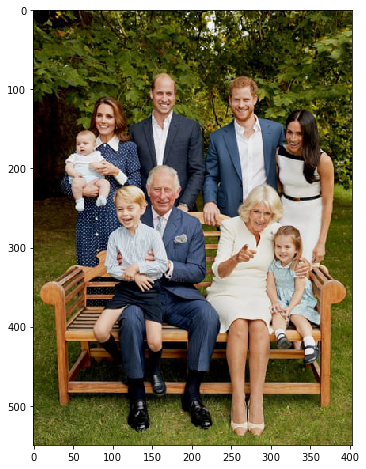

In [52]:
display(face)

1
2
2
1
5
0
2
0
2


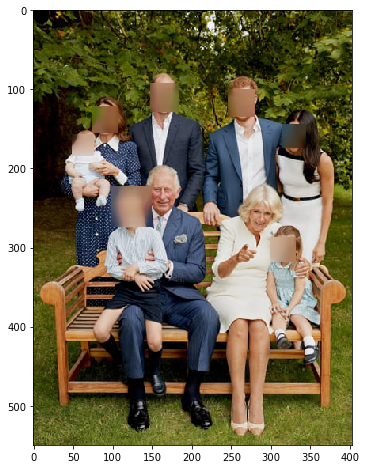

In [53]:
detected =blur_face(face)
display(detected)